<a href="https://colab.research.google.com/github/Shubz224/POS-Parts-Of-Speech-Tagging-in-NLP/blob/main/PosTaggingNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install & Import Required Libraries
# Explanation:
We need to install NLTK (Natural Language Toolkit) and import necessary modules. NLTK provides tools for working with human language data (text). We'll also import string for basic string operations and matplotlib/seaborn for visualizations.

In [ ]:
# Install NLTK if not already installed
!pip install nltk matplotlib seaborn

# Import required libraries
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import indian
from nltk.tag import tnt

print("✓ Libraries installed & imported successfully!")

✓ Libraries installed & imported successfully!


# Step 2: Download NLTK Datasets
# Explanation:
NLTK requires specific datasets for Hindi language processing:

punkt: For tokenization (splitting text into words/sentences)

indian: Contains Hindi POS-tagged corpus for training

In [ ]:
# Download datasets
nltk.download('punkt')
nltk.download('indian')

print("✓ NLTK datasets downloaded!")

✓ NLTK datasets downloaded!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Package indian is already up-to-date!


# Step 3: Load & Explore Hindi Corpus
# Explanation:
We'll load the Hindi POS-tagged corpus and check basic statistics:

Total sentences

Example sentence

Unique POS tags

In [ ]:
# Load Hindi corpus
tagged_set = "hindi.pos"
hindi_sentences = indian.sents(tagged_set)
tagged_sentences = indian.tagged_sents(tagged_set)

# Print stats
print(f"Total sentences: {len(hindi_sentences)}")
print("\nExample sentence:")
print(tagged_sentences[0])  # Show first tagged sentence

# Count unique POS tags
all_tags = [tag for sentence in tagged_sentences for (_, tag) in sentence]
print(f"\nUnique POS tags: {len(set(all_tags))}")

Total sentences: 540

Example sentence:
[('पूर्ण', 'JJ'), ('प्रतिबंध', 'NN'), ('हटाओ', 'VFM'), (':', 'SYM'), ('इराक', 'NNP')]

Unique POS tags: 26


# Step 4: Visualize POS Tag Distribution
# Explanation:
Creates a bar chart showing frequency of the top 15 POS tags in the corpus. This helps understand which grammatical categories (nouns, verbs etc.) are most common.

<ipython-input-26-657beb46f060>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for (tag, count) in top_tags],


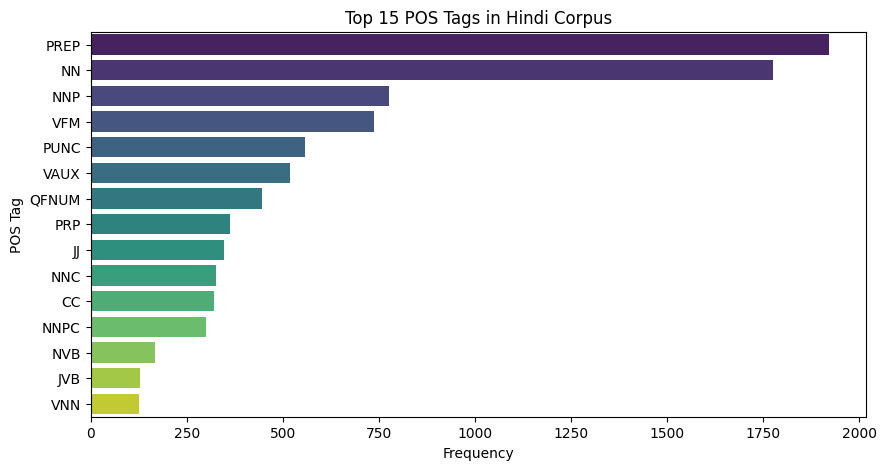

In [ ]:
# Get tag frequencies
tag_freq = nltk.FreqDist(all_tags)
top_tags = tag_freq.most_common(15)

# Create plot
plt.figure(figsize=(10,5))
sns.barplot(x=[count for (tag, count) in top_tags],
            y=[tag for (tag, count) in top_tags],
            palette="viridis")

plt.title("Top 15 POS Tags in Hindi Corpus")
plt.xlabel("Frequency")
plt.ylabel("POS Tag")
plt.show()

# Step 5: Train the POS Tagger
# Explanation:
We'll:

1. Split data into training (90%) and testing (10%)

2. Train using TnT (Trigrams'n'Tags) algorithm

3. Evaluate accuracy

In [ ]:
# Split dataset
train_size = int(0.9 * len(tagged_sentences))
train_data = tagged_sentences[:train_size]
test_data = tagged_sentences[train_size:]

# Train TnT tagger
pos_tagger = tnt.TnT()
pos_tagger.train(train_data)

# Evaluate
accuracy = pos_tagger.evaluate(test_data)
print(f"Model Accuracy: {accuracy:.2%}")

<ipython-input-27-e74f5cb4afd8>:11: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = pos_tagger.evaluate(test_data)


Model Accuracy: 81.11%


# Step 6: Analyze Sentence Lengths
# Explanation:
Visualizes distribution of sentence lengths to understand corpus complexity using a histogram.

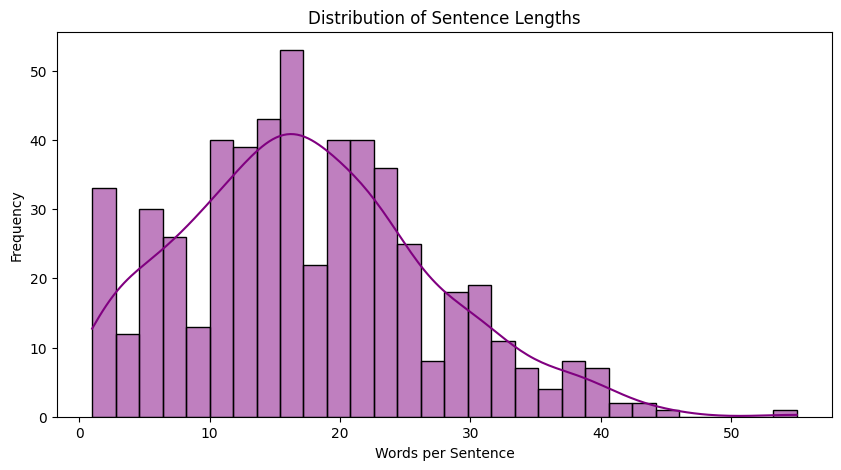

Average length: 17.4 words


In [ ]:
# Calculate lengths
sentence_lengths = [len(s) for s in hindi_sentences]

# Plot
plt.figure(figsize=(10,5))
sns.histplot(sentence_lengths, bins=30, kde=True, color='purple')
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Words per Sentence")
plt.ylabel("Frequency")
plt.show()

print(f"Average length: {sum(sentence_lengths)/len(sentence_lengths):.1f} words")

# Step 7: Tag a Sample Sentence
# Explanation:
Demonstrates the trained tagger on a new Hindi sentence with formatted output.

In [ ]:
from IPython.display import HTML

def colorize_tags(tagged_sentence):
    html = """
    <style>
    .tag-container {
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        line-height: 2.2;
        font-size: 17px;
        padding: 15px;
        background: #f8f9fa;
        border-radius: 8px;
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
        margin: 10px 0;
    }
    .tag-label {
        display: inline-block;
        margin: 2px;
        padding: 4px 8px;
        border-radius: 12px;
        font-weight: 500;
        transition: transform 0.2s;
        box-shadow: 0 1px 3px rgba(0,0,0,0.1);
    }
    .tag-label:hover {
        transform: translateY(-2px);
        box-shadow: 0 4px 6px rgba(0,0,0,0.1);
    }
    .noun { background: #94e2d5; color: #1e3a3a; }
    .verb { background: #f38ba8; color: #4a1e2a; }
    .adj  { background: #f9e2af; color: #3a3a1e; }
    .adv  { background: #89b4fa; color: #1e2a3a; }
    .pronoun { background: #cba6f7; color: #2a1e3a; }
    .postposition { background: #fab387; color: #3a2a1e; }
    .punctuation { background: #9399b2; color: white; }
    .default { background: #d9d9d9; color: #333; }
    .tag-type {
        font-size: 0.7em;
        margin-left: 4px;
        opacity: 0.8;
        font-weight: normal;
    }
    .legend {
        display: flex;
        flex-wrap: wrap;
        gap: 8px;
        margin-bottom: 15px;
        font-size: 14px;
    }
    .legend-item {
        display: flex;
        align-items: center;
        margin-right: 10px;
    }
    .legend-color {
        width: 16px;
        height: 16px;
        border-radius: 50%;
        margin-right: 5px;
        display: inline-block;
    }
    </style>

    <div class="tag-container">
        <div class="legend">
            <div class="legend-item"><span class="legend-color" style="background: #94e2d5"></span>Noun</div>
            <div class="legend-item"><span class="legend-color" style="background: #f38ba8"></span>Verb</div>
            <div class="legend-item"><span class="legend-color" style="background: #f9e2af"></span>Adjective</div>
            <div class="legend-item"><span class="legend-color" style="background: #89b4fa"></span>Adverb</div>
            <div class="legend-item"><span class="legend-color" style="background: #cba6f7"></span>Pronoun</div>
            <div class="legend-item"><span class="legend-color" style="background: #fab387"></span>Postposition</div>
            <div class="legend-item"><span class="legend-color" style="background: #9399b2"></span>Punctuation</div>
            <div class="legend-item"><span class="legend-color" style="background: #d9d9d9"></span>Other</div>
        </div>
    """

    for word, tag in tagged_sentence:
        if tag.startswith('NN'):
            html += f'<span class="tag-label noun">{word}<span class="tag-type">{tag}</span></span>'
        elif tag.startswith('VM'):
            html += f'<span class="tag-label verb">{word}<span class="tag-type">{tag}</span></span>'
        elif tag.startswith('JJ'):
            html += f'<span class="tag-label adj">{word}<span class="tag-type">{tag}</span></span>'
        elif tag.startswith('RB'):
            html += f'<span class="tag-label adv">{word}<span class="tag-type">{tag}</span></span>'
        elif tag.startswith('PR'):
            html += f'<span class="tag-label pronoun">{word}<span class="tag-type">{tag}</span></span>'
        elif tag.startswith('PSP'):
            html += f'<span class="tag-label postposition">{word}<span class="tag-type">{tag}</span></span>'
        elif tag.startswith('SYM') or tag in [',', '.', '!', '?']:
            html += f'<span class="tag-label punctuation">{word}<span class="tag-type">{tag}</span></span>'
        else:
            html += f'<span class="tag-label default">{word}<span class="tag-type">{tag}</span></span>'

    html += "</div>"
    return HTML(html)

# Example usage
sample = pos_tagger.tag("प्रधानमंत्री ने संसद में भाषण दिया".split())
colorize_tags(sample)